In [1]:
import cv2
import numpy as np
import pathlib as Path
from matplotlib import pyplot as plt
import argparse
import os
import mahotas

filename = "traffic.jpeg"
img_type_flag  = 1
  
img = cv2.imread(filename,img_type_flag)

if img is None:
    print("Error: Could not open or find the image.")
else:
    cv2.imshow("image",img)
    cv2.waitKey(0)

cv2.destroyAllWindows()  

imread() and Color channels

In [2]:
r1 = img[:,:,0]
g1 = img[:,:,1]
b1 = img[:,:,2]

height = img.shape[0]
width = img.shape[1]
rgb = img.shape[2]

print(f"Width: {width} Height: {height} Channels: {rgb}")
cv2.imwrite("editedimg.jpg",img)


Width: 275 Height: 183 Channels: 3


True

In [3]:
img[0,0] = (0,0,255)

(b,g,r) = img[0,0]
 
print(f"Pixel at (0,0) - Red: {r} Green: {g} Blue: {b}")

corner = img[0:100, 0:100]
cv2.imshow("Corner", corner)

img[0:100,0:100] = (0,255,0)
 
cv2.imshow("Updated", img)
cv2.waitKey(0)

cv2.destroyAllWindows()  

Pixel at (0,0) - Red: 255 Green: 0 Blue: 0


2 Drawing capabilities of OpenCV
2.1 Drawing Line

In [4]:
canvas = np.zeros((300,300,3),dtype = "uint8")
img = np.zeros((512,512,3),np.uint8)

cv2.line(img,(0,0),(511,511),(255,0,0),5)
green =  (0,255,0)
cv2.line(canvas,(0,0),(300,300),green)
cv2.imshow("Canvas",canvas)

cv2.waitKey(0)

red = (0,0,255)
cv2.line(canvas,(300,0),(0,300),red)
cv2.imshow("Canvas",canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()


2.3 Drawing Circle

In [5]:
cv2.circle(img,(447,63),63,red,-1)

canvas = np.zeros((300,300,3),dtype = "uint8")
(centerX,centerY) =  (canvas.shape[1]//2, canvas.shape[0]//2)
white = (255,255,255)
#xrange = canvas.shape[1]

for r in range(0,175,25):
    cv2.circle(canvas,(centerX,centerY),r,white,-1)

cv2.imshow("Canvas",canvas)



Multiple Circles

In [6]:

canvas = np.zeros((300,300,3),dtype = "uint8")
for i in range(0,25):
    radius = np.random.randint(5,200)
    color = np.random.randint(0,256,(3,)).tolist()
    pt = np.random.randint(0,300,(2,))
    cv2.circle(canvas,tuple(pt),radius,color,-1)
    cv2.imshow("Canvas",canvas)

cv2.waitKey(0)
cv2.destroyAllWindows()

3. Affine Transformation

In [7]:
def translate(image,x,y):
    image = cv2.imread(image)
    M =  np.float32([[1,0,x],[0,1,y]])
    shifted = cv2.warpAffine(image,M,(image.shape[1],image.shape[0]))
    return shifted

3.2 Rotation

In [8]:
def rotate(image,angle, center = None, scale = 1.0):
    image = cv2.imread(image)
    (h,w) = image.shape[:2]
    if center is None:
        center = (w/2,h/2)
    M = cv2.getRotationMatrix2D(center,angle,scale)
    rotated = cv2.warpAffine(image,M,(w,h))

    return rotated

In [9]:
img2 = 'newkitten.jpeg'

shifted = translate(img2,100,50)
cv2.imshow("Shifted Down",shifted)

rotated = rotate(img2,270)
cv2.imshow("Rotated",rotated)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
def resize(image, width = None, height = None, inter = cv2.INTER_AREA): 
    image = cv2.imread(image)
    dim = None 
    (h, w) = image.shape[:2] 
    if width is None and height is None:  
     return image
    if width is None: 
        r = height / float(h) 
        dim = (int(w*r), height)  
    else: 
        r=  width / float (w) 
        dim = (width, int(h*r)) 
    resized = cv2.resize(image, dim, interpolation = inter)
    
    return resized 

In [11]:
resized = resize(img2, width = 100)
cv2.imshow("Resized",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.4 Flipante

In [12]:
kingcat = cv2.imread("kingcat.jpeg")

flipped = cv2.flip(kingcat,0)

cv2.imshow("Flipped vertically",flipped,)

flipped = cv2.flip(kingcat,-1)
cv2.imshow("Flipped both horizontally and vertically", flipped)


3.5 Cropping

In [13]:
cropped = kingcat[0:250,0:100]

cv2.imshow("Crop",cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.6 Aritmética

In [14]:
M = np.ones(kingcat.shape,dtype = "uint8")*100
added = cv2.add(kingcat,M)
cv2.imshow("Added", added)

M = np.ones(kingcat.shape,dtype = "uint8")*50
subtracted = cv2.subtract(kingcat,M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

3.7 Operadores Lógicos

In [15]:
rectangle = np.zeros((300,300),dtype = "uint8")
cv2.rectangle(rectangle,(25,25),(275,275),255,-1)
cv2.imshow("Rectangle",rectangle)

circle = np.zeros((300,300),dtype = "uint8")
cv2.circle(circle,(150,150),150,255,-1)
cv2.imshow("Circle",circle)

andgate = cv2.bitwise_and(rectangle,circle)
cv2.imshow("AND",andgate)

orgate = cv2.bitwise_or(rectangle,circle)
cv2.imshow("OR",orgate)

xorgate = cv2.bitwise_xor(rectangle,circle)
cv2.imshow("XOR",xorgate)

inv = cv2.imread("tobeinverted.jpeg")
cv2.imshow("Original",inv)

notgate = cv2.bitwise_not(inv)
cv2.imshow("NOT", notgate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
stadium = cv2.imread("estadio.jpg")
mask  = np.zeros(stadium.shape[:2],dtype = "uint8")
(centerX,centerY) =  (mask.shape[1]//2, mask.shape[0]//2)
cv2.circle(mask,(centerX,centerY),100,255,-1)
masked = cv2.bitwise_and(stadium,stadium, mask=mask)
cv2.imshow("Original",stadium)
cv2.imshow("Mask",mask)
cv2.imshow("Mask applied to image", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.8 Splitting and Merging

In [17]:
(B,G,R)= cv2.split(kingcat)

cv2.imshow("Red",R)
cv2.imshow("Green",G)
cv2.imshow("Blue",B)

merged = cv2.merge([B, G ,R])
cv2.imshow("Merged",merged)

cv2.waitKey(0)
zeros = np.zeros(kingcat.shape[:2], dtype = "uint8")
cv2.imshow("Red",cv2.merge([zeros,zeros,R]))
cv2.imshow("Green",cv2.merge([zeros,G,zeros]))
cv2.imshow("Blue",cv2.merge([B,zeros,zeros]))
cv2.waitKey(0)
cv2.destroyAllWindows()

4. Histograms

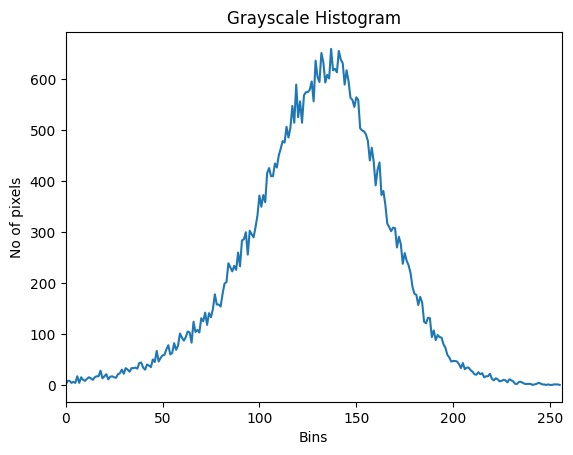

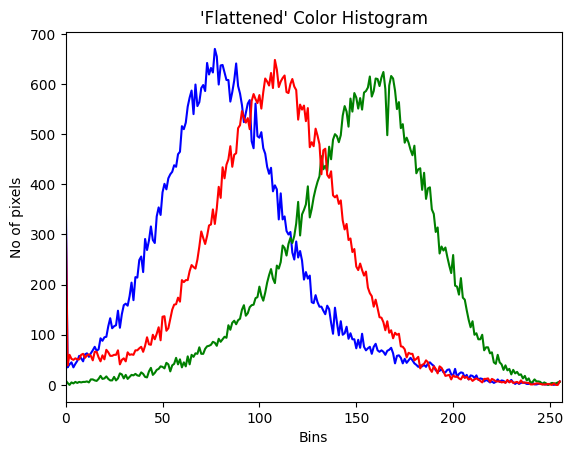

In [18]:

pavorreal = cv2.imread("pavorreal.jpeg")
g_pavorreal = cv2.cvtColor(pavorreal,cv2.COLOR_BGR2GRAY)
cv2.imshow("Original",pavorreal)

hist = cv2.calcHist([g_pavorreal],[0],None,[256],[0,256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("No of pixels")
plt.plot(hist)
plt.xlim([0,256])
plt.show()
cv2.waitKey(0)

chnls = cv2.split(pavorreal)
colors = ("b","g","r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("No of pixels")

for (chan,color) in zip(chnls,colors):
    hist = cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist,color = color)
    plt.xlim([0,256])

cv2.waitKey(0)
cv2.destroyAllWindows()


5 Blurred

In [19]:
blurred = np.hstack([cv2.blur(pavorreal,(3,3)),
                     cv2.blur(pavorreal,(5,5)),
                     cv2.blur(pavorreal,(7,7))])

blurred_g = np.hstack([cv2.GaussianBlur(pavorreal,(3,3),0),
                     cv2.GaussianBlur(pavorreal,(5,5),0),
                     cv2.GaussianBlur(pavorreal,(7,7),0)])


blurred_m = np.hstack([cv2.medianBlur(pavorreal,3),
                     cv2.medianBlur(pavorreal,5),
                     cv2.medianBlur(pavorreal,7)])

blurred_bi = np.hstack([cv2.bilateralFilter(pavorreal,5,21,21),
                     cv2.bilateralFilter(pavorreal,7,31,31),
                     cv2.bilateralFilter(pavorreal,9,41,41)])

cv2.imshow("Averaged",blurred)
cv2.imshow("Gaussian",blurred_g)
cv2.imshow("Median",blurred_m)
cv2.imshow("Bilateral",blurred_bi)
cv2.waitKey(0)
cv2.destroyAllWindows()

6 Thresholding

In [20]:
beach = cv2.imread("playa.jpeg")

if beach is None: print("Error image")
else:
    beach = cv2.cvtColor(beach,cv2.COLOR_BGR2GRAY) 
    blurred = cv2.GaussianBlur(beach,(5,5),0)
    cv2.imshow("Image",beach)
    (T,thresh) = cv2.threshold(blurred,155,255,cv2.THRESH_BINARY)
    cv2.imshow("Threshold Binary",thresh)
    (T,threshInv) = cv2.threshold(blurred,155,255,cv2.THRESH_BINARY_INV)
    cv2.imshow("Threshold Binary Inverse", threshInv)
    cv2.imshow("Coins",cv2.bitwise_and(beach,beach,mask=threshInv))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [21]:
#6.1 Adaptive Thresholding
image = cv2.imread("plane.jpeg")

if image is None:
    print("No such image path")
else:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    cv2.imshow("Beach",gray)

    thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,4)
    cv2.imshow("Mean Thresh",thresh)

    thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,3)
    cv2.imshow("Gaussian Thresh", thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
image = cv2.imread("plane.jpeg")
if image is None:
    print("No such path")

else:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    cv2.imshow("Image",image)

    T = mahotas.thresholding.otsu(blurred)
    print(f"Otsu's threshold: {T}")

    thresh = image.copy()
    thresh[thresh>T] = 255
    thresh[thresh < 255] = 0
    thresh = cv2.bitwise_not(thresh)
    cv2.imshow("Otsu",thresh)

    T = mahotas.thresholding.rc(blurred)
    print(f"Riddler-Calvard: {T}")
    thresh = image.copy()
    thresh[thresh>T] =255
    thresh[thresh<255]=0
    thresh = cv2.bitwise_not(thresh)
    cv2.imshow("Riddler-Calvard",thresh)
    cv2.waitKey(0)

cv2.destroyAllWindows()


Otsu's threshold: 122
Riddler-Calvard: 122.70285969232623


7. Gradients and Edge Detection

In [23]:
#7.1 Laplacian
image = cv2.imread("venado.jpeg")

if image is None:
    print("No existe la imagen")

else:
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    cv2.imshow("Original",image)
    lap = cv2.Laplacian(image,cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))
    cv2.imshow("Laplacian",lap)

    sobelX = cv2.Sobel(image,cv2.CV_64F,1,0)
    sobelY = cv2.Sobel(image,cv2.CV_64F,0,1)

    sobelX = np.uint8(np.absolute(sobelX))
    sobelY = np.uint8(np.absolute(sobelY))

    sobelCombined = cv2.bitwise_or(sobelX,sobelY)

    cv2.imshow("SobelX:",sobelX)
    cv2.imshow("SobelY:",sobelY)
    cv2.imshow("Sobel combined:",sobelCombined)

    cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
#7.2 Canny Edge
image = cv2.imread("venado.jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Blurred",image)

canny = cv2.Canny(image,30,150)
cv2.imshow("Canny",canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
#7.3 Contours

image = cv2.imread("coins.jpeg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray,(11,11),150)
cv2.imshow("image",image)
edged = cv2.Canny(blurred,30,150)
cv2.imshow("Edges",edged)

(cnts,_)  = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(f"I count {len(cnts)} coins")

coins = image.copy()
cv2.drawContours(coins,cnts,-1,(0,255,0),2)
cv2.imshow("Coins",coins)

for (i,c) in enumerate(cnts):
    (x,y,w,h) = cv2.boundingRect(c)
    print(f"Coin {i+1}")
    coin = image[y:y +h, x:x+w]
    cv2.imshow("Coin",coin)

    mask = np.zeros(image.shape[:2],dtype= "uint8")
    ((centerX,centerY),radius)=cv2.minEnclosingCircle(c)
    cv2.circle(mask,(int(centerX),int(centerY)),int(radius),255,-1 )
    mask = mask[y:y+h,x:x+w]
    cv2.imshow("Masked Coin", cv2.bitwise_and(coin,coin,mask = mask))

cv2.waitKey(0)
cv2.destroyAllWindows()

I count 8 coins
Coin 1
Coin 2
Coin 3
Coin 4
Coin 5
Coin 6
Coin 7
Coin 8
